# Model Fitting

Let's say that we have observed (somehow) $n$ data points, where the data consist of $X \rightarrow Y$ (possibly vector) pairs. This data could be anything - [the 2 point correlation function vs cosmology](../../astro/clustering/main.ipynb), height as a function of weight, etc, etc.

We then want to build a model that allows us to predict $Y$ for some new $X$. Ideally we would have both the expectation, and the uncertainty.

We assume that we have some model $m$ that maps $X \rightarrow Y$ with some parameters $\beta$. The goal here is to choose $\beta$ well. We also assume that $n > {\rm len}(\beta)$. If we have fewer data points that free parameters, the model is generally underdetermined.

## Imports etc...

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

import helpers as h

In [4]:
%run ~/.jupyter/config.ipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Helpers

In [26]:
x = np.linspace(0, 3, num=8)

def linear_func(a, b, x):
    return a * x + b

a, b = 2, 3
std = 0.1
y = linear_func(a, b, x) + np.random.normal(0, std, size=len(x))


def add_bias(x):                      
    return np.vstack((x, np.ones(len(x)))).T

# Non-Bayesian Methods

## Regression

This is perhaps the simplest way of fitting a model to data. We just pick some measure that penalizes deviations between the model and data, and minimize that measure.

In the example below, we minimize the [least squares](https://en.wikipedia.org/wiki/Least_squares).

True: 2.00, 3.00, Model: 2.00, 2.97


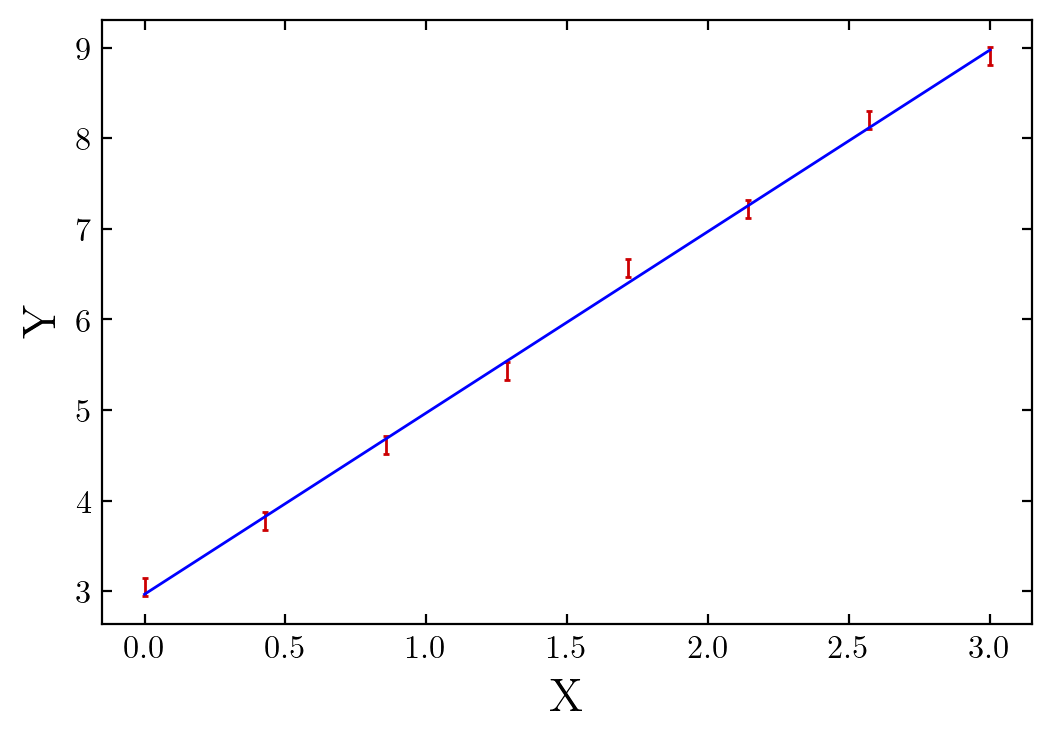

In [46]:
_, ax = plt.subplots()
ax.errorbar(x, y, yerr=std, linestyle="")

pred = np.linalg.lstsq(add_bias(x), y, rcond=None)[0]

ax.plot(x, x * pred[0] + pred[1])
ax.set(xlabel="X", ylabel="Y")

print(f"True: {a:.2f}, {b:.2f}, Model: {pred[0]:.2f}, {pred[1]:.2f}")

## Maximum Likelihood

# Bayesian Methods

## Maximum A Posteriori (MAP)

## Likelihood

## Posterior